In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("/content/IMDB Dataset.csv", on_bad_lines='skip', quoting=0)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# EDA:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#df.duplicated().sum()
df.drop_duplicates(inplace= True)
df.duplicated().sum()


np.int64(0)

/tmp/ipython-input-2961957915.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], data = df, palette = 'Set2')


<Axes: xlabel='sentiment', ylabel='count'>

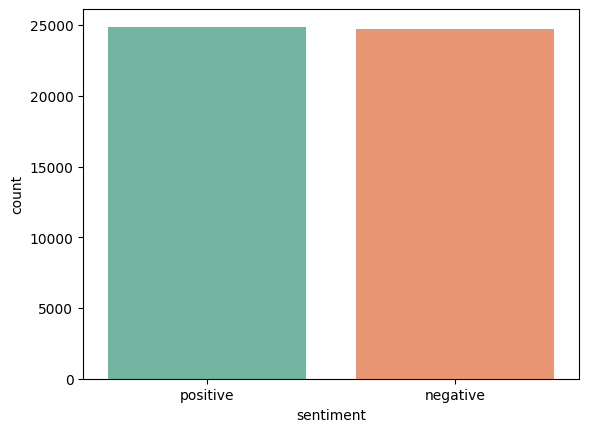

In [ ]:
sns.countplot(x=df['sentiment'], data = df, palette = 'Set2')

# Preprocessing

In [ ]:
df['sentiment']= df['sentiment'].map({'positive': 1, 'negative': 0})
df['sentiment'] = df['sentiment'].astype(bool)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,True
1,A wonderful little production. <br /><br />The...,True
2,I thought this was a wonderful way to spend ti...,True
3,Basically there's a family where a little boy ...,False
4,"Petter Mattei's ""Love in the Time of Money"" is...",True
...,...,...
49995,I thought this movie did a down right good job...,True
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",False
49997,I am a Catholic taught in parochial elementary...,False
49998,I'm going to have to disagree with the previou...,False


In [ ]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
  text = re.sub(r'<.*?>', '', text)
  text = text.lower()
  words= text.split()
  words = [word for word in words if word not in stop_words]
  text = ' '.join(words)
  return text

df['review'] = df['review'].apply(clean_text)
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,True
1,wonderful little production. filming technique...,True
2,thought wonderful way spend time hot summer we...,True
3,basically there's family little boy (jake) thi...,False
4,"petter mattei's ""love time money"" visually stu...",True
...,...,...
49995,thought movie right good job. creative origina...,True
49996,"bad plot, bad dialogue, bad acting, idiotic di...",False
49997,catholic taught parochial elementary schools n...,False
49998,going disagree previous comment side maltin on...,False


# Model Training and testing

In [ ]:
x = df['review']
y = df['sentiment']

x_train, x_text , y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

## Navie Bayes:

In [ ]:
tfidf= TfidfVectorizer(max_features=5000)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_text)

model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

y_pred = model.predict(x_test_tfidf)

# Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8531814056670364


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.84      0.85      4939
        True       0.85      0.86      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[4170  769]
 [ 687 4291]]


In [ ]:
feature_names = tfidf.get_feature_names_out()
sorted_indices = model.feature_log_prob_[0].argsort()

top_pos = feature_names[sorted_indices[:10]]
top_neg = feature_names[sorted_indices[-10:]]

print("Top Positive Words:")
print(top_pos)

print("Top Negative Words:")
print(top_neg)

Top Positive Words:
['custer' 'felix' 'miyazaki' 'matthau' 'superbly' 'understated' 'flawless'
 'loneliness' 'uplifting' 'cassavetes']
Top Negative Words:
['really' 'would' 'it' 'good' 'even' 'like' 'bad' 'one' 'film' 'movie']


## Suport Vector Machine:

In [ ]:
svm_model = LinearSVC()
svm_model.fit(x_train_tfidf, y_train)

y_pred_svm = svm_model.predict(x_test_tfidf)


print("                   Evaluation of SVM")
print(accuracy_score(y_test, y_pred_svm))
print('\n')
print(classification_report(y_test, y_pred_svm))


                   Evaluation of SVM
0.8805082182111525


              precision    recall  f1-score   support

       False       0.89      0.87      0.88      4939
        True       0.87      0.89      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



## Performance boosting

In [ ]:
params = {'C': [0.1, 1, 10], 'max_iter' : [1000, 2000]}

grid_search = GridSearchCV(svm_model, params, cv=5)
grid_search.fit(x_train_tfidf, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'max_iter': 1000}
Best Accuracy: 0.8895247699483171


# Saving pkl file for model deployment

In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
  pickle.dump(svm_model, f)



# Model Selection:
 The accuracy socre of Navie Bayes is 0.85 meaning this model identify 85% correct result.To improve this accuracy score, i explored some other models for supervised learning that can be use in our problem (i.e Sentiment Analysis).
 I selected Support Vector Machine (SVM), which is known to be very powerfull for text classification tasks, especially with high-dimensional features.The result that i got from this model is slightly better than from previous one. Accuracy Score is 0.89 meaning, it will predict 89% correct result.